In [1]:
# fix for keras v3.0 update
import os
#os.environ['TF_USE_LEGACY_KERAS'] = '1' 

import tensorflow as tf
import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import Sequence
from qkeras import *
import keras_tuner as kt

import sys 
parentdir = os.path.dirname(os.getcwd())
sys.path.insert(0, parentdir) 
from FilteringModel import *

2025-06-10 14:18:48.856858: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-10 14:18:48.858115: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-10 14:18:48.861211: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-10 14:18:48.869762: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749583128.883909 1069496 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749583128.88

In [2]:
from tensorflow.keras.models import Model

# 1. Define the input
x_size = Input(shape=(1,), name="x_size")

# 2. Single Dense layer for binary classification
output = Dense(1, activation="sigmoid", name="output")(x_size)

# 3. Create and compile the model
model = Model(inputs=x_size, outputs=output)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# (Optional) View the model summary
model.summary()


2025-06-10 14:18:51.495098: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ x_size (InputLayer)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ x_size (InputLayer)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

2025-06-10 14:18:52.087120: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:381] TFRecordDataset `buffer_size` is unspecified, default to 262144


Epoch 1/10


/home/youeric/miniconda3/envs/mlproj/lib/python3.10/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: x_size
Received: inputs=['Tensor(shape=(None, 1))']
  warnings.warn(msg)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5839 - loss: 0.6860 - val_accuracy: 0.4450 - val_loss: 0.7038
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5839 - loss: 0.6856 - val_accuracy: 0.4450 - val_loss: 0.7035
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5839 - loss: 0.6858 - val_accuracy: 0.4450 - val_loss: 0.7031
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5839 - loss: 0.6860 - val_accuracy: 0.4450 - val_loss: 0.7028
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5839 - loss: 0.6862 - val_accuracy: 0.4450 - val_loss: 0.7025
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5839 - loss: 0.6864 - val_accuracy: 0.4450 - val_loss: 0.7022
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5839 - loss: 0.6866 - val_accuracy: 0.4450 - val_loss: 0.7018
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.5839 - loss: 0.6868 - val_accuracy: 0.4450 - val_loss: 0.

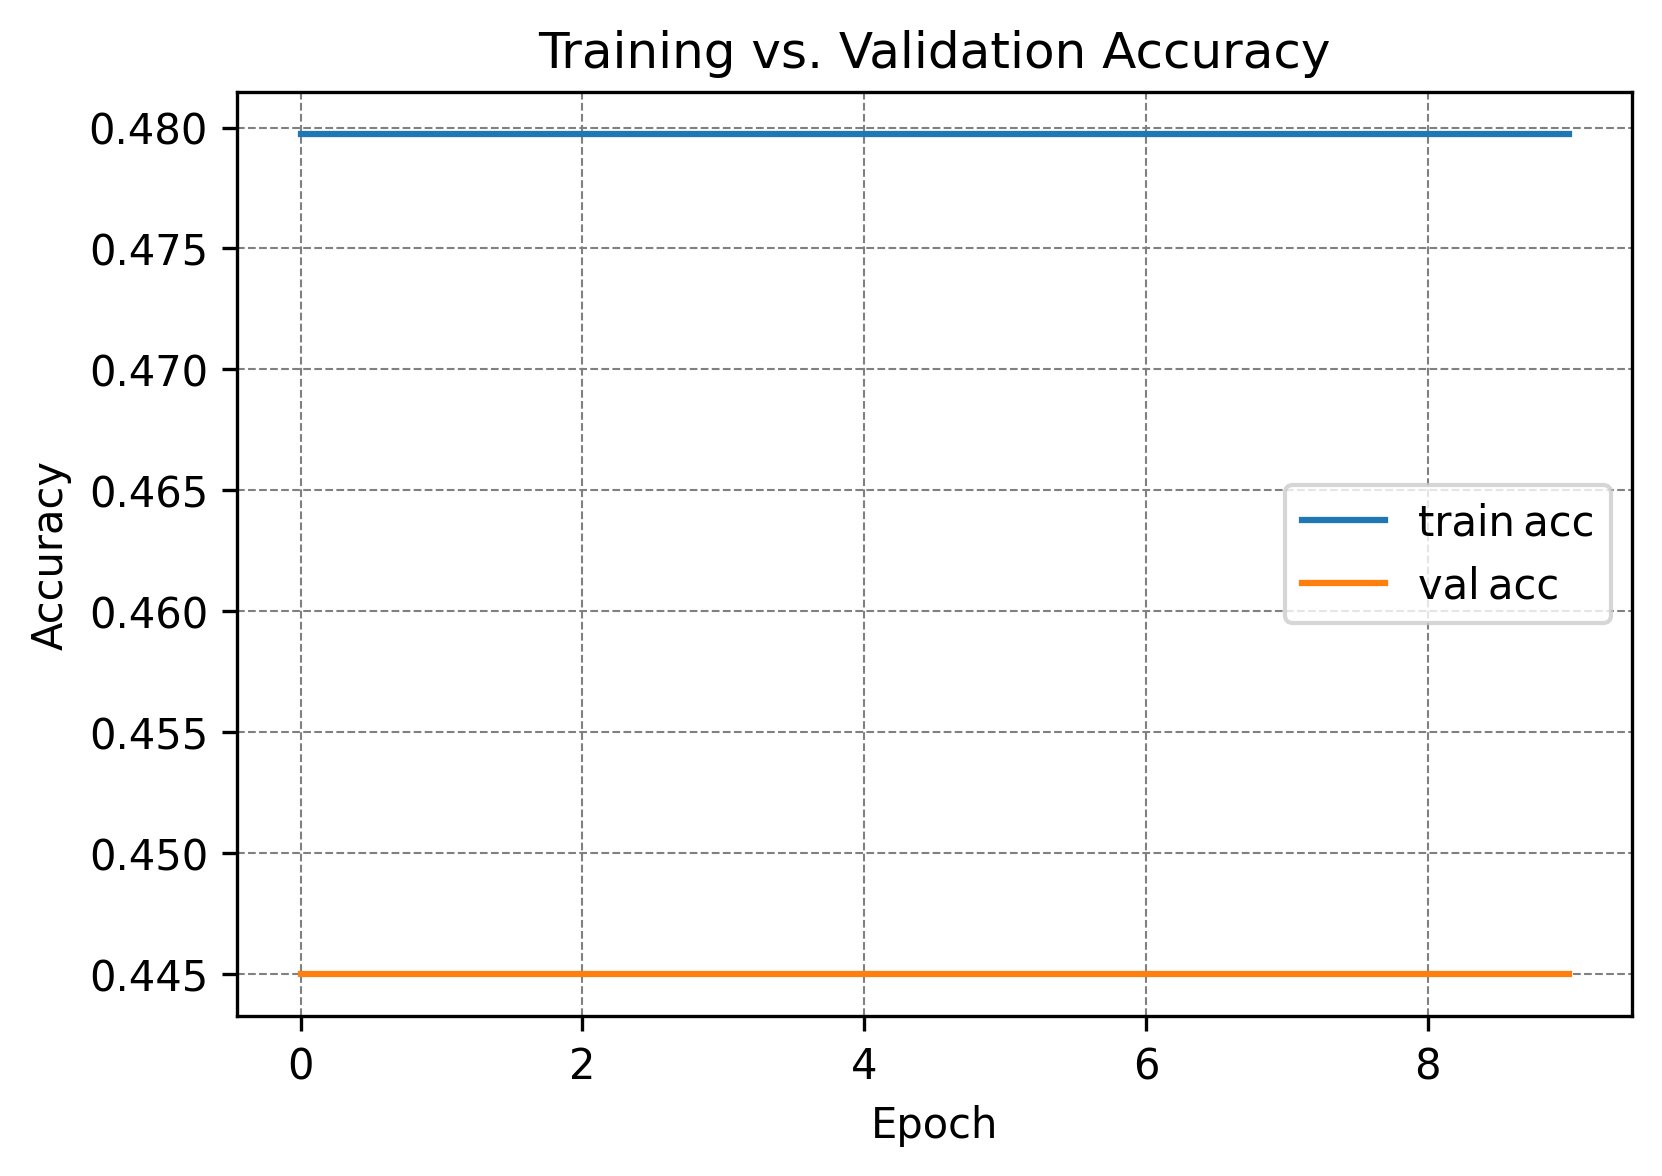

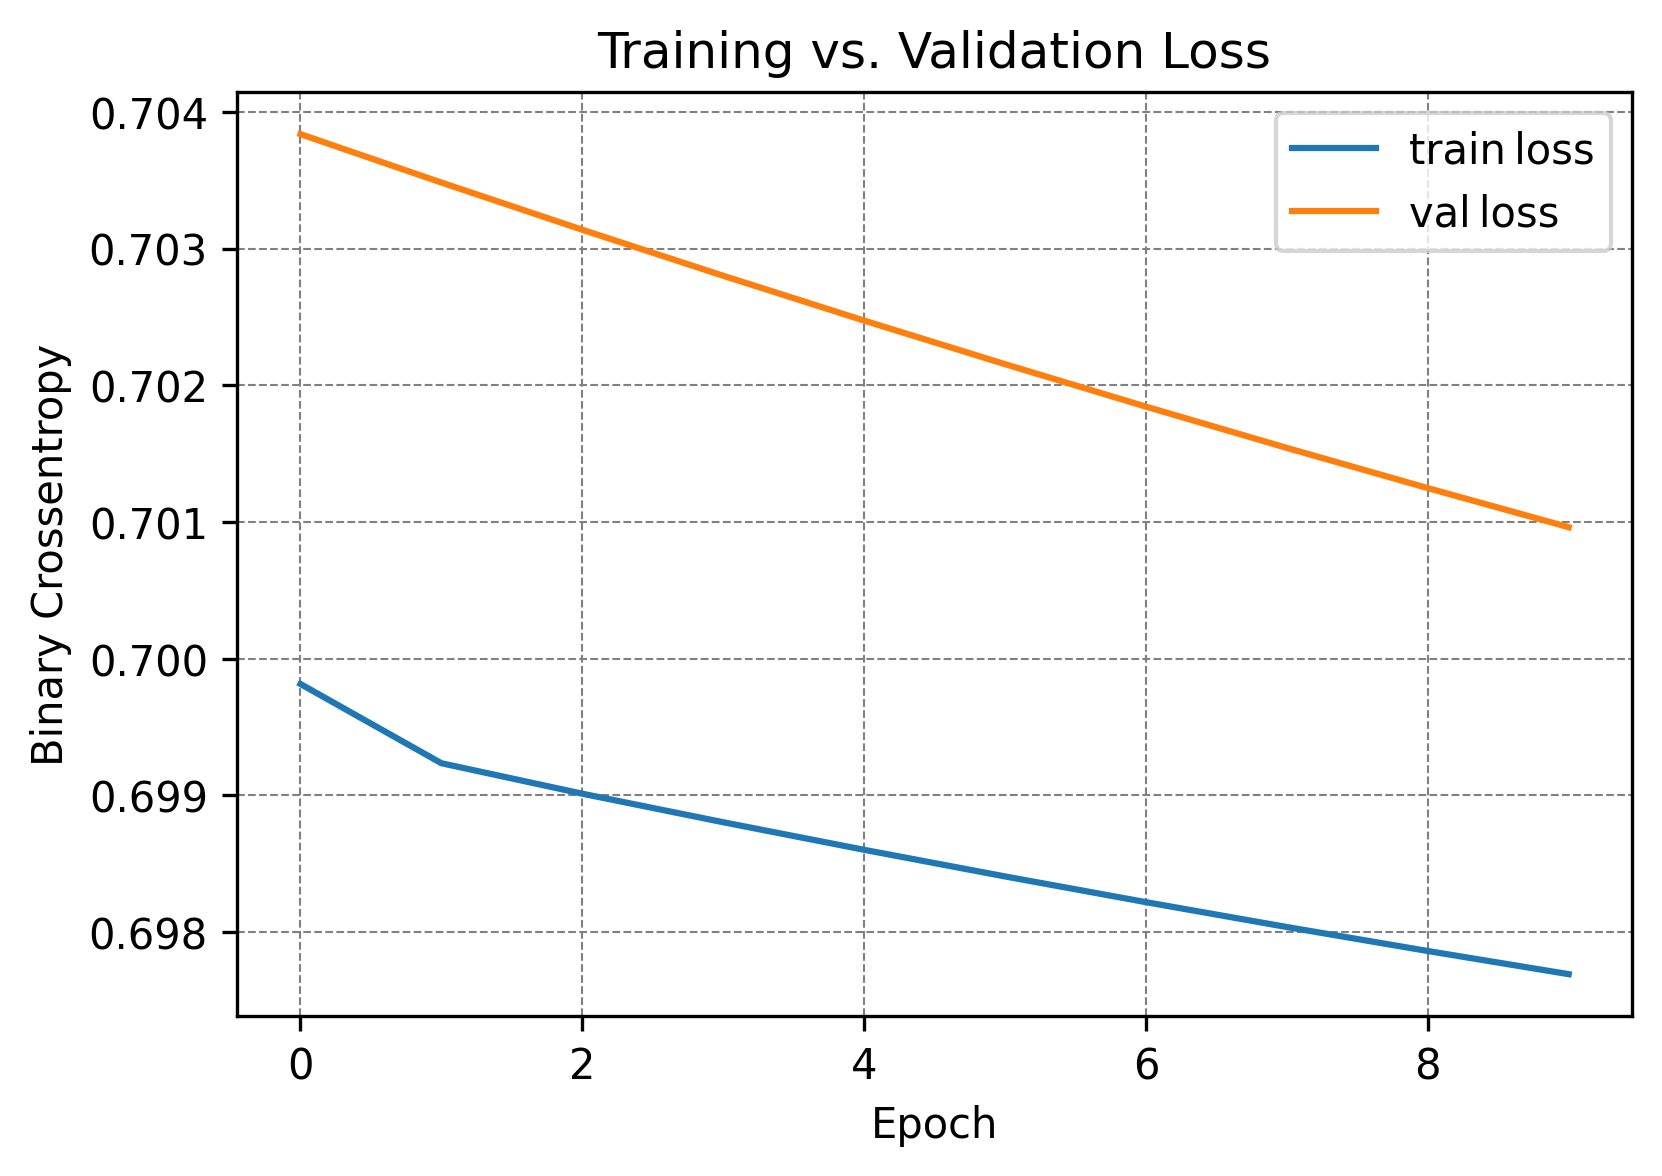

In [3]:

import OptimizedDataGenerator4 as ODG
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1) Build the simple model:
def CreateSimpleXSizeModel():
    x_size = tf.keras.Input(shape=(1,), name="x_size")
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(x_size)
    model = tf.keras.Model(inputs=x_size, outputs=output)
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = CreateSimpleXSizeModel()
model.summary()

base_dir      = Path("./filtering_records2000")
train_dir     = base_dir / "tfrecords_train"
validation_dir= base_dir / "tfrecords_validation"

train_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(train_dir),
    x_feature_description=["x_size"]
)

val_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(validation_dir),
    x_feature_description=["x_size"]
)

es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[es],
    shuffle=False,
    verbose=1
)


# 6) Plot training/validation accuracy and loss:
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Loss")
plt.show()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ y_profile (InputLayer)          │ (None, 13, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_128 (Dense)              │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/home/youeric/miniconda3/envs/mlproj/lib/python3.10/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: y_profile
Received: inputs=['Tensor(shape=(None, 13))']
  warnings.warn(msg)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5043 - loss: 1.0829 - val_accuracy: 0.6612 - val_loss: 0.7508
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4985 - loss: 0.9012 - val_accuracy: 0.6680 - val_loss: 0.6762
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5011 - loss: 0.8138 - val_accuracy: 0.6665 - val_loss: 0.6727
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4859 - loss: 0.8154 - val_accuracy: 0.6666 - val_loss: 0.6728
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4812 - loss: 0.8065 - val_accuracy: 0.6679 - val_loss: 0.6649
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4816 - loss: 0.7987 - val_accuracy: 0.6679 - val_loss: 0.6669
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4798 - loss: 0.7942 - val_accuracy: 0.6686 - val_loss: 0.6599
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4810 - loss: 0.7890 - val_accuracy: 0.6686 - val_loss: 0.

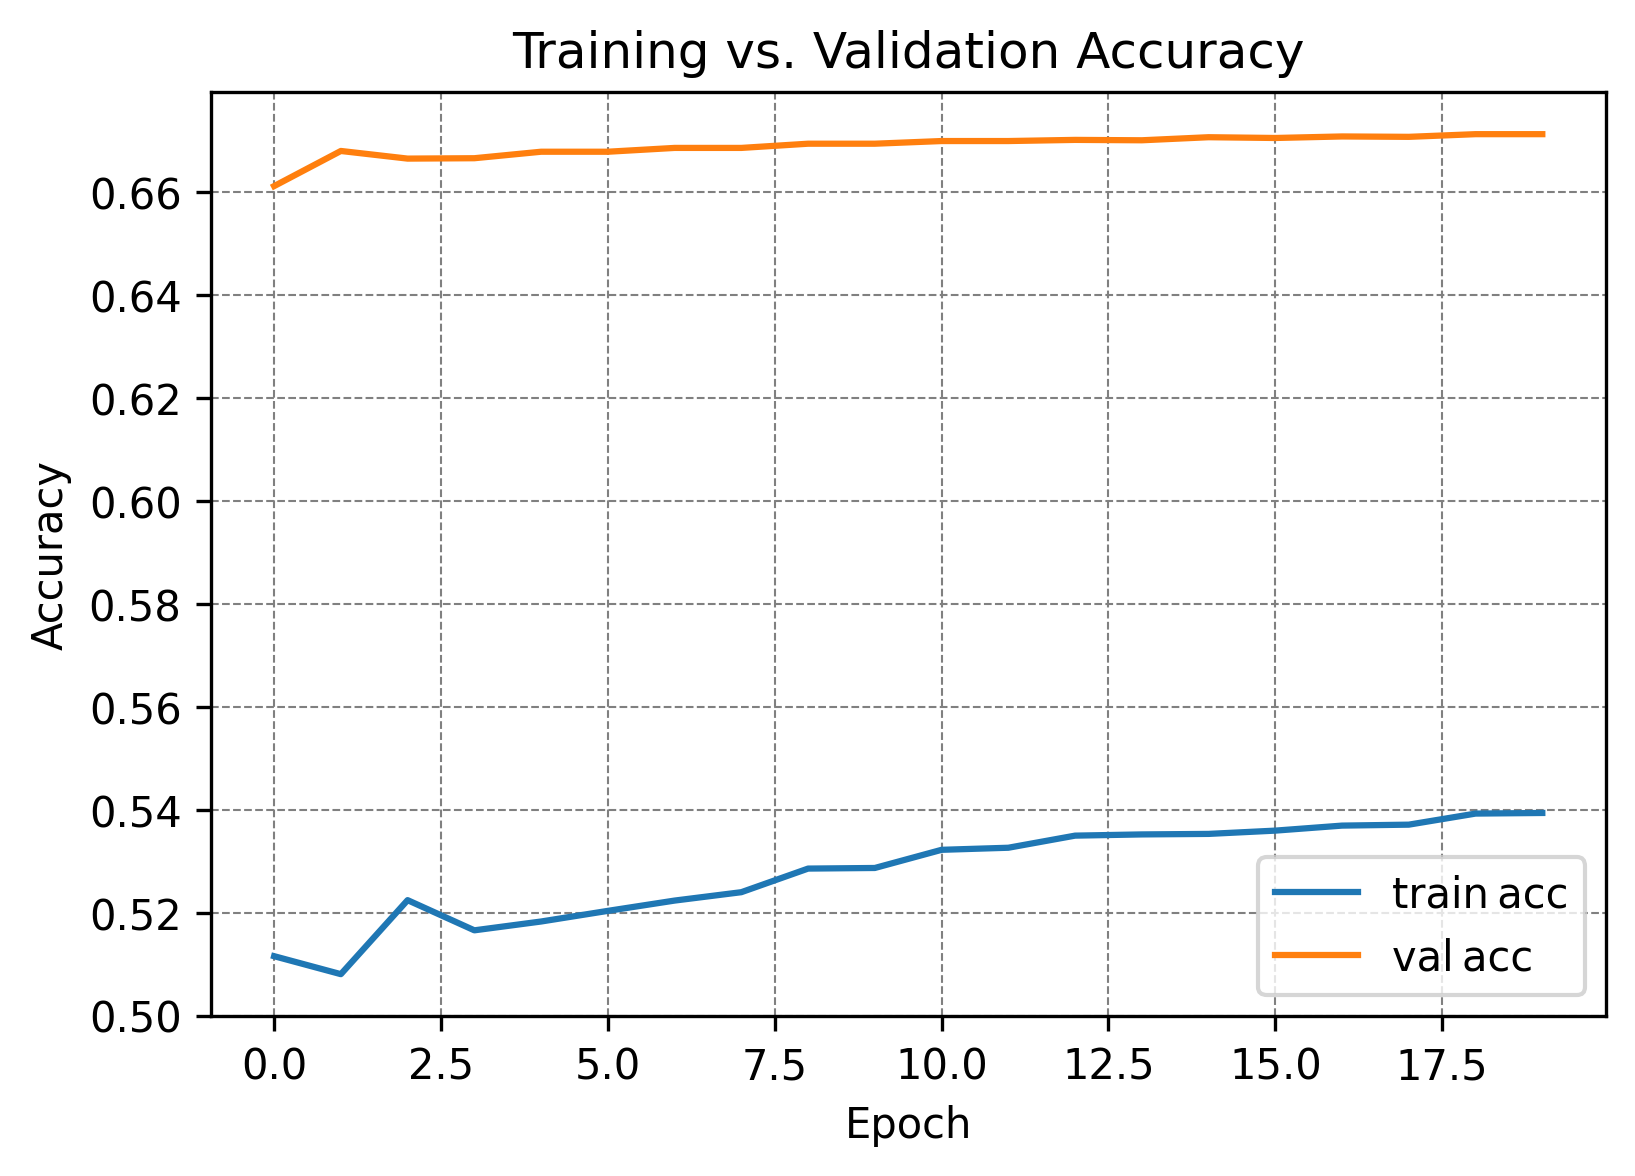

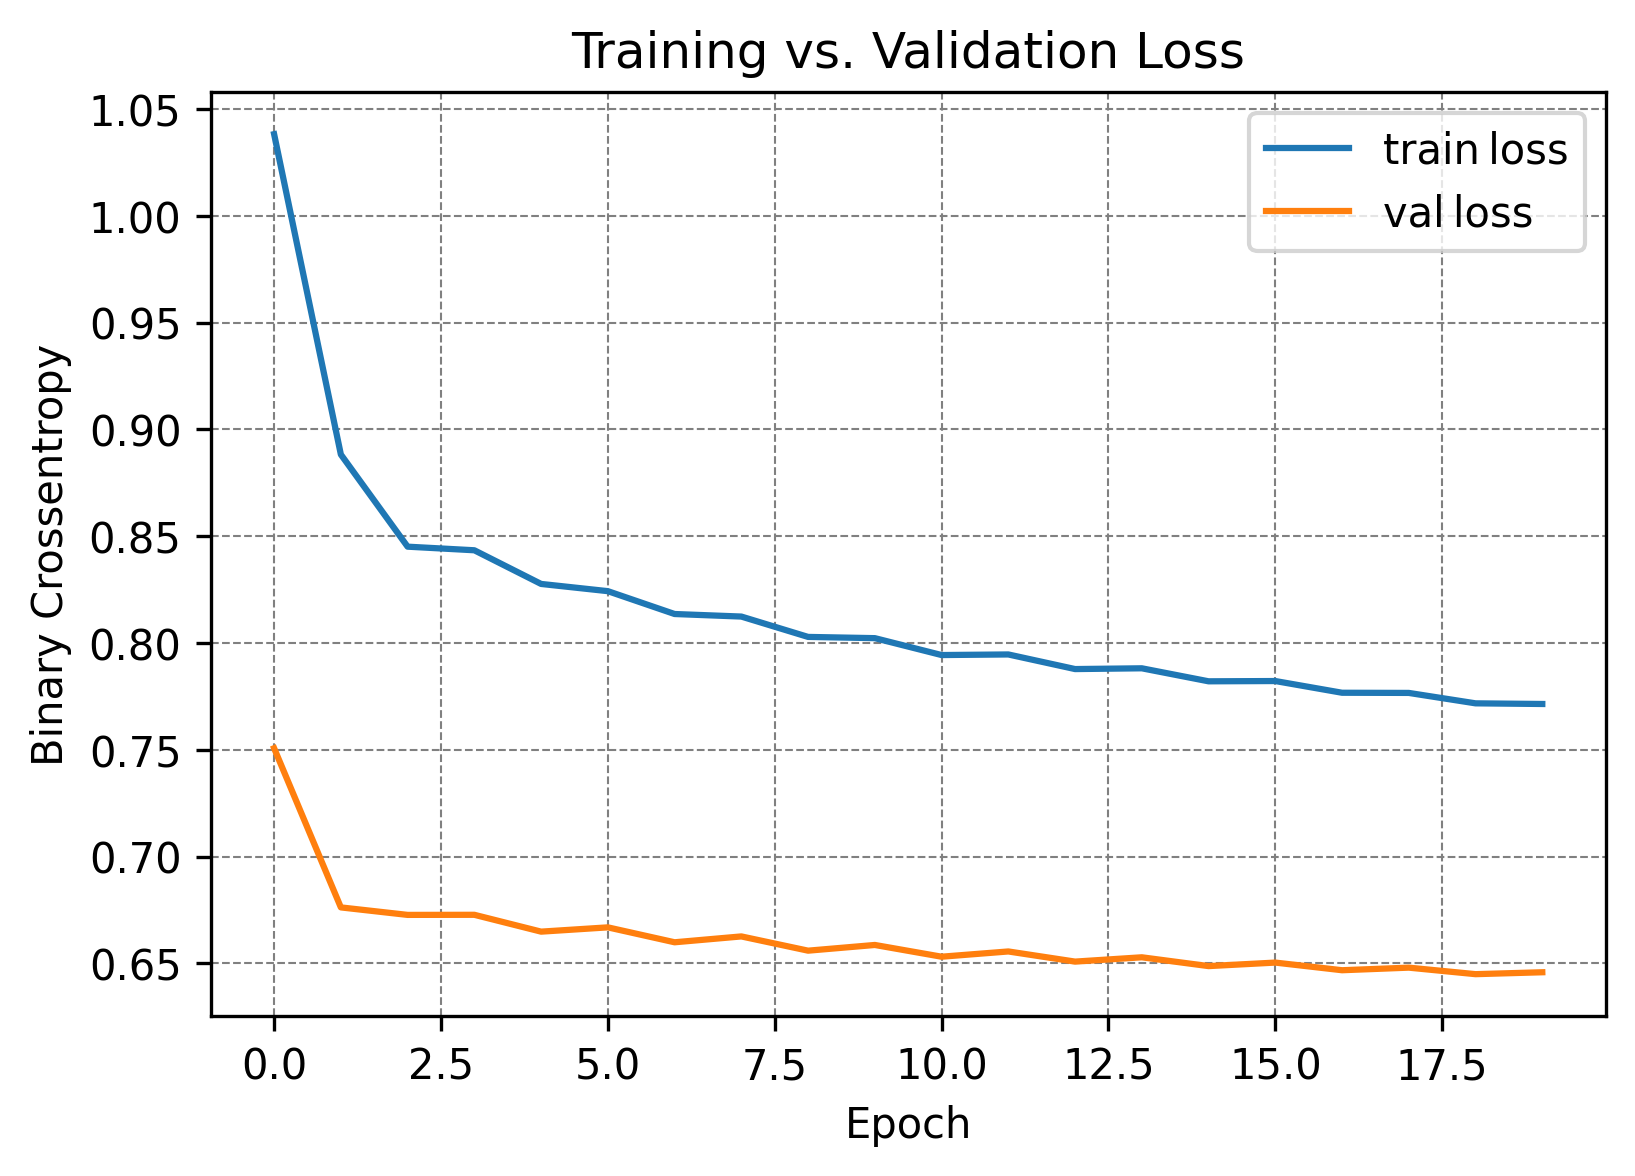

In [4]:
import OptimizedDataGenerator4 as ODG
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Build a model that takes y_profile (13×1), flattens, then has a 128-unit hidden layer before the final output:
def CreateYProfileWithHidden128():
    y_profile = tf.keras.Input(shape=(13, 1), name="y_profile")
    x = tf.keras.layers.Flatten(name="flatten")(y_profile)
    x = tf.keras.layers.Dense(128, activation="relu", name="hidden_128")(x)
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(x)
    model = tf.keras.Model(inputs=y_profile, outputs=output)
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = CreateYProfileWithHidden128()
model.summary()


# 2) TFRecord directories:
base_dir       = Path("./filtering_records2000")
train_dir      = base_dir / "tfrecords_train"
validation_dir = base_dir / "tfrecords_validation"


# 3) Generators loading only "y_profile":
train_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(train_dir),
    x_feature_description=["y_profile"]
)

val_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(validation_dir),
    x_feature_description=["y_profile"]
)


# 4) EarlyStopping callback:
es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)


# 5) Train for 20 epochs:
history = model.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[es],
    shuffle=False,
    verbose=1
)


# 6) Plot accuracy and loss:
plt.figure(figsize=(6, 4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Loss")
plt.show()


(None, 21)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ x_profile           │ (None, 21, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y_profile           │ (None, 13, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_x (Flatten) │ (None, 21)        │          0 │ x_profile[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_y (Flatten) │ (None, 13)        │          0 │ y_profile[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_xy           │ (None, 34)        │          0 │ flatten_x[0][0],  │
│ (Concatenate)       │                   │            │ flatten_y[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_128 (Dense)  │ (None, 64)        │      2,240 │ concat_xy[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_1282 (Dense) │ (None, 64)        │      4,160 │ hidden_128[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_1283 (Dense) │ (None, 64)        │      4,160 │ hidden_1282[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         65 │ hidden_1283[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6405 - loss: 2.0302 - val_accuracy: 0.5550 - val_loss: 1.5178
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.2331 - loss: 1.6005 - val_accuracy: 0.6457 - val_loss: 0.6306
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5674 - loss: 0.6910 - val_accuracy: 0.6538 - val_loss: 0.6304
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5465 - loss: 0.7118 - val_accuracy: 0.6610 - val_loss: 0.6141
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5548 - loss: 0.6823 - val_accuracy: 0.6650 - val_loss: 0.6090
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5587 - loss: 0.6709 - val_accuracy: 0.6695 - val_loss: 0.6035
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5694 - loss: 0.6595 - val_accuracy: 0.6730 - val_loss: 0.5997
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5747 - loss: 0.6509 - val_accuracy: 0.

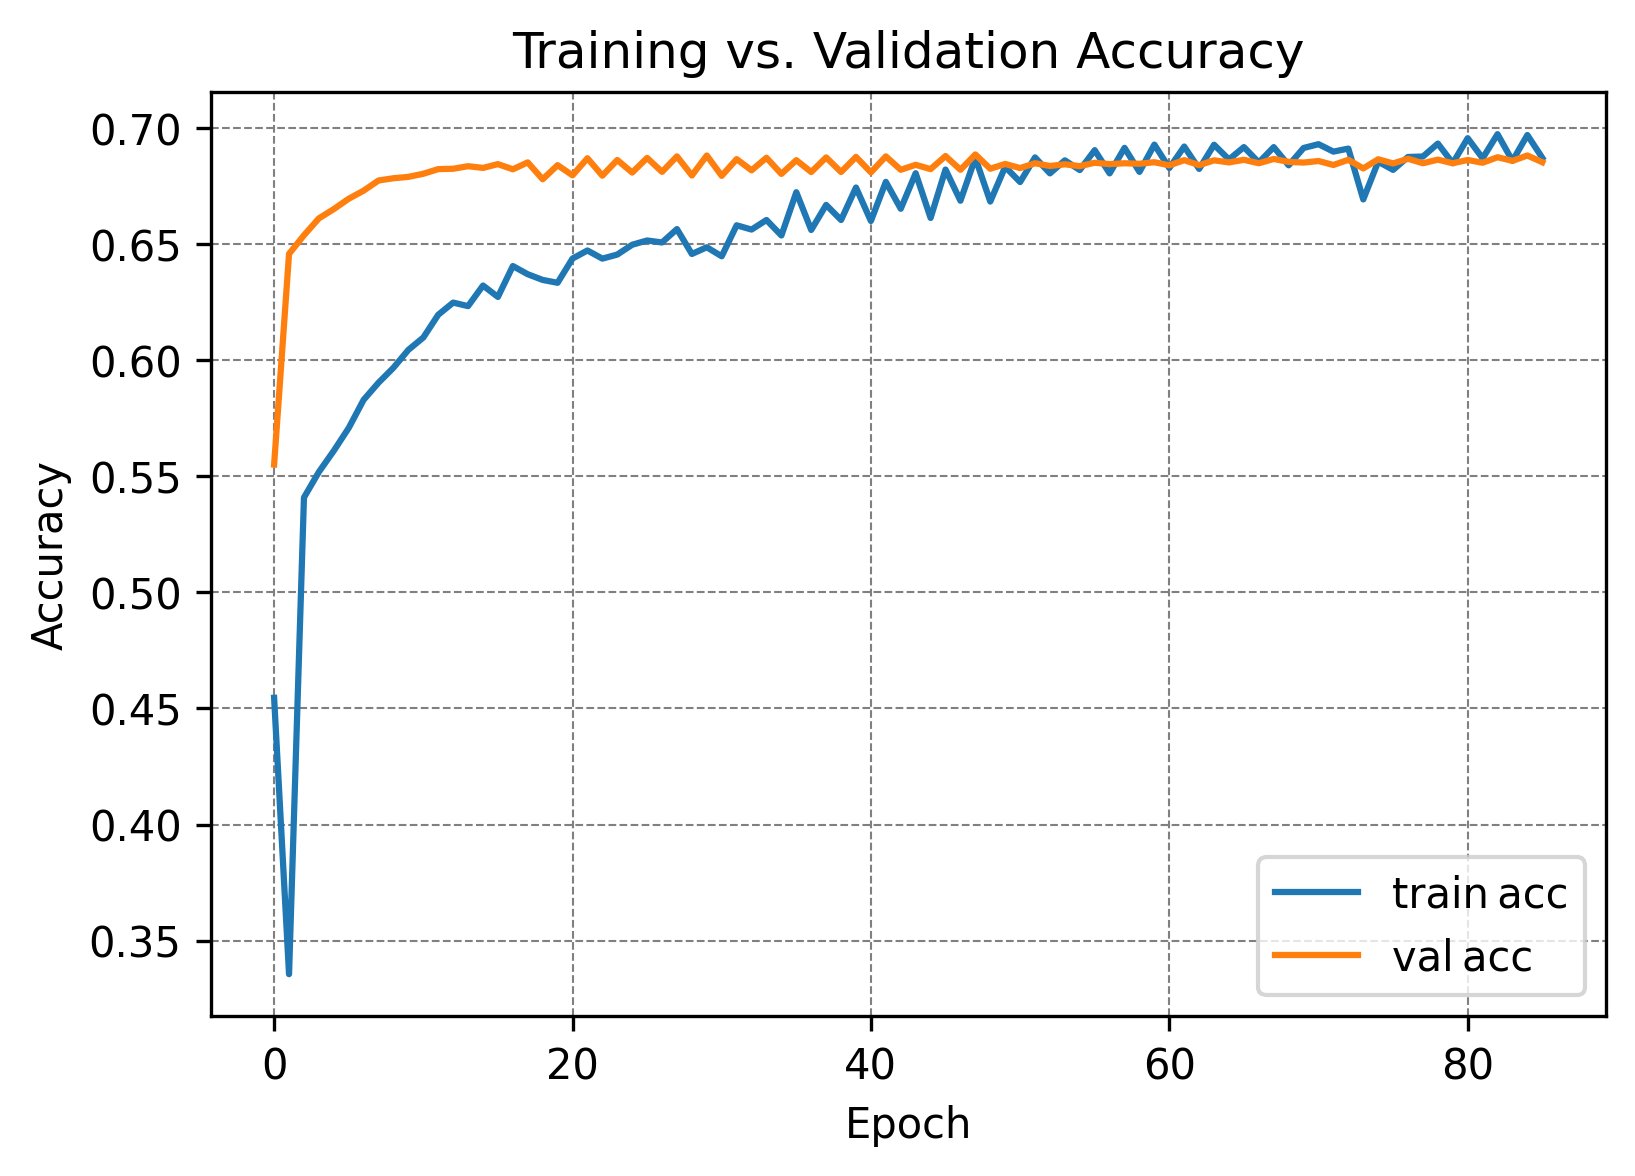

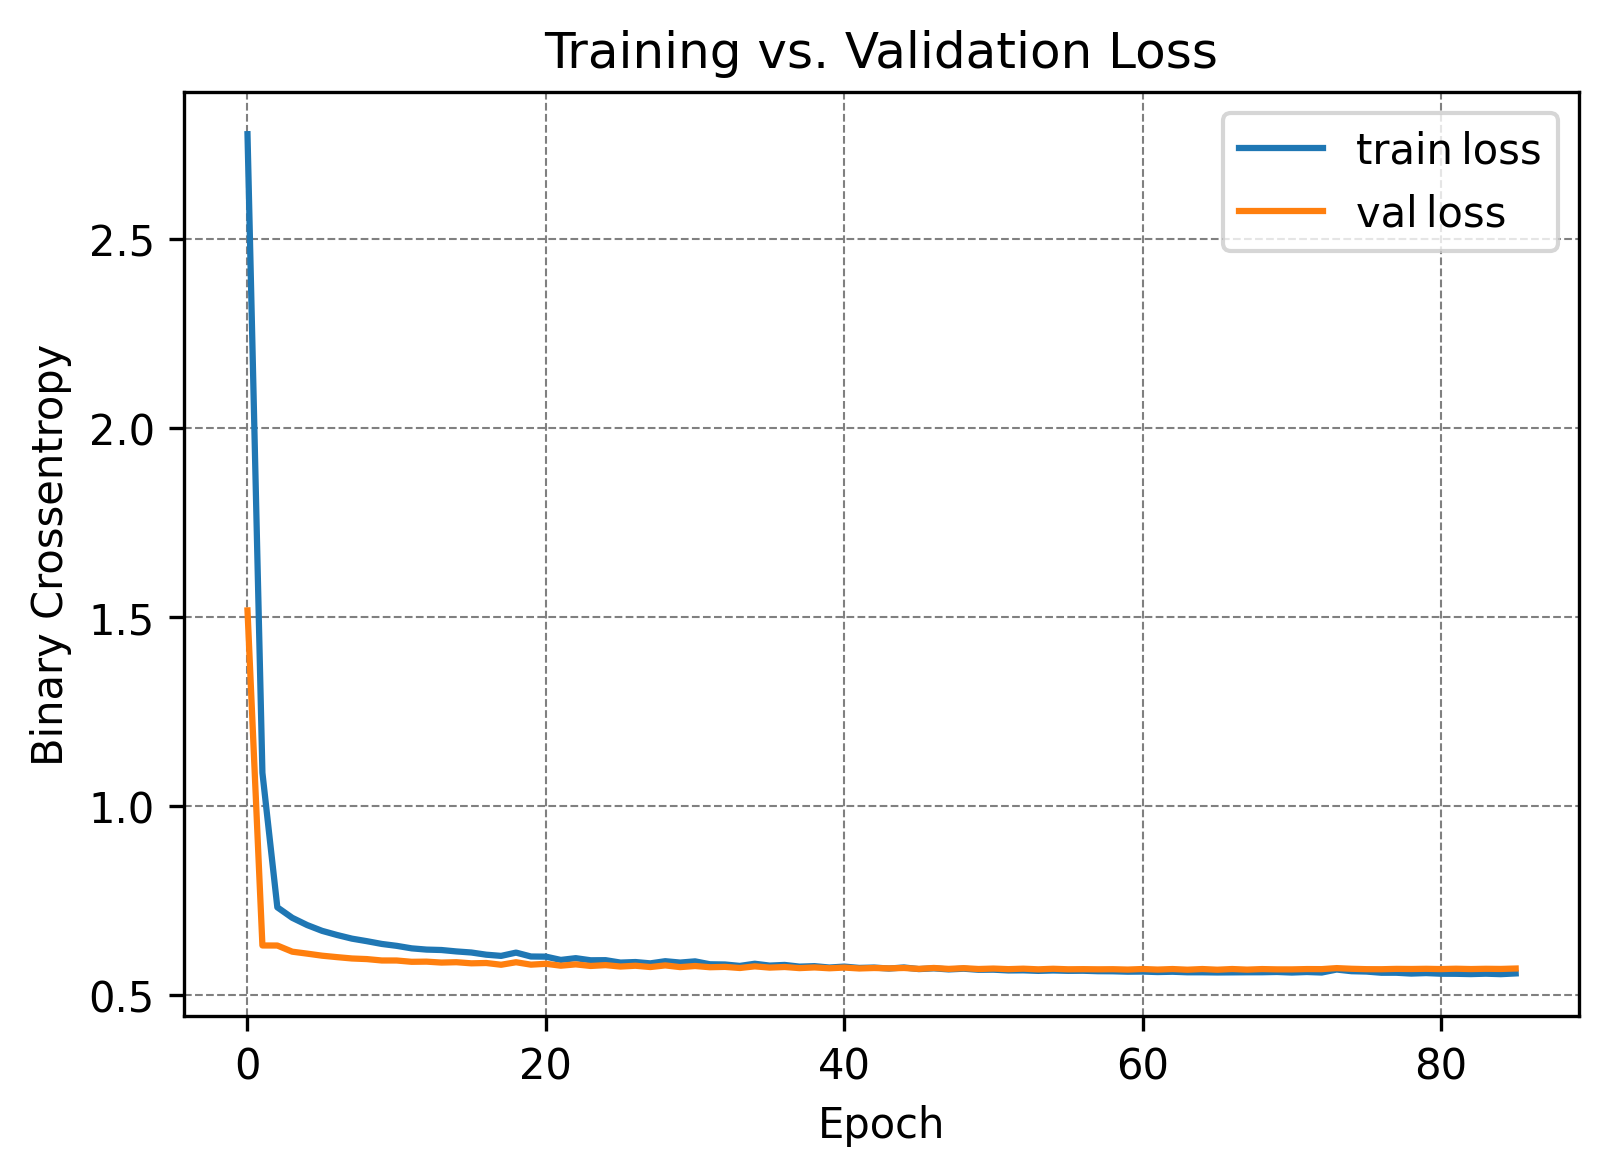

In [5]:
import OptimizedDataGenerator4 as ODG
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Build a model that takes both x_profile (21×1) and y_profile (13×1):
def CreateXYProfileModel():
    x_profile = tf.keras.Input(shape=(21, 1), name="x_profile")
    y_profile = tf.keras.Input(shape=(13, 1), name="y_profile")
    
    # Flatten each profile
    x_flat = tf.keras.layers.Flatten(name="flatten_x")(x_profile)    # shape → (21,)
    y_flat = tf.keras.layers.Flatten(name="flatten_y")(y_profile)    # shape → (13,)
    
    print(x_flat.shape)

    # Concatenate into a single vector of length 34
    concat = tf.keras.layers.Concatenate(name="concat_xy")([x_flat, y_flat])
    
    # Hidden Dense(128) layer
    hidden = tf.keras.layers.Dense(64, activation="relu", name="hidden_128")(concat)

    hidden2 = tf.keras.layers.Dense(64, activation="relu", name="hidden_1282")(hidden)
    
    hidden3 = tf.keras.layers.Dense(64, activation="relu", name="hidden_1283")(hidden2)
    # Final sigmoid output
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(hidden3)
    
    model = tf.keras.Model(inputs=[x_profile, y_profile], outputs=output)
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = CreateXYProfileModel()
model.summary()


# 2) TFRecord directories:
base_dir       = Path("./filtering_records2000")
train_dir      = base_dir / "tfrecords_train"
validation_dir = base_dir / "tfrecords_validation"


# 3) Generators loading both "x_profile" and "y_profile":
train_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(train_dir),
    x_feature_description=["x_profile", "y_profile"]
)

val_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(validation_dir),
    x_feature_description=["x_profile", "y_profile"]
)


# 4) EarlyStopping callback:
es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)


# 5) Train for 100 epochs (or adjust as needed):
history = model.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=200,
    callbacks=[es],
    shuffle=False,
    verbose=1
)


# 6) Plot training/validation accuracy and loss:
plt.figure(figsize=(6, 4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Loss")
plt.show()


In [6]:
import OptimizedDataGenerator4 as ODG
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Build a model that takes x_profile (21×1) and y_profile (13×1),
#    then two hidden layers (128 → 32) before output.
def CreateXYProfileModel():
    x_profile = tf.keras.Input(shape=(21, 1), name="x_profile")
    y_profile = tf.keras.Input(shape=(13, 1), name="y_profile")
    
    x_flat = tf.keras.layers.Flatten(name="flatten_x")(x_profile)    # → (21,)
    y_flat = tf.keras.layers.Flatten(name="flatten_y")(y_profile)    # → (13,)
    
    concat = tf.keras.layers.Concatenate(name="concat_xy")([x_flat, y_flat])  # → (34,)
    
    hidden1 = tf.keras.layers.Dense(64, activation="relu", name="hidden_128")(concat)
    hidden2 = tf.keras.layers.Dense(16, activation="relu",  name="hidden_32")(hidden1)
    
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(hidden2)
    
    model = tf.keras.Model(inputs=[x_profile, y_profile], outputs=output)
    return model

model = CreateXYProfileModel()


# 2) Instead of a fixed‐LR Adam, create a CosineDecay schedule:
#    - initial_learning_rate = 1e-3 (for example)
#    - decay_steps = total_training_steps (epochs × steps_per_epoch)
#    - alpha = final_learning_rate_fraction (e.g. 0.0 to decay to zero)
#
#    We must know: steps_per_epoch = number of training batches per epoch.
#    Since train_gen yields batches automatically, you can do:
#       steps_per_epoch = len(train_gen)
#    If you plan 100 epochs, total_steps = 100 × steps_per_epoch.

base_dir       = Path("./filtering_records2000")
train_dir      = base_dir / "tfrecords_train"
validation_dir = base_dir / "tfrecords_validation"

train_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(train_dir),
    x_feature_description=["x_profile", "y_profile"]
)
val_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(validation_dir),
    x_feature_description=["x_profile", "y_profile"]
)

# how many batches per epoch?
steps_per_epoch = len(train_gen)

# choose number of epochs (e.g., 100)
num_epochs = 100

total_steps = steps_per_epoch * num_epochs

# CosineDecay: initial_lr=1e-3, decay_steps=total_steps, alpha=0.0 (ends at 0)
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=total_steps,
    alpha=0.0
)

# Create Adam optimizer with that schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# 3) Compile model with cosine‐decayed learning rate and binary_crossentropy loss:
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


# 4) EarlyStopping callback
es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

# 5) Fit for num_epochs
history = model.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=num_epochs,
    callbacks=[es],
    shuffle=False,
    verbose=1
)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.3878 - loss: 1.7413 - val_accuracy: 0.5840 - val_loss: 0.9651
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4469 - loss: 1.2040 - val_accuracy: 0.6265 - val_loss: 0.7470
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5492 - loss: 0.8858 - val_accuracy: 0.6414 - val_loss: 0.7069
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.5403 - loss: 0.8747 - val_accuracy: 0.6492 - val_loss: 0.7035
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5238 - loss: 0.8743 - val_accuracy: 0.6572 - val_loss: 0.6901
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5272 - loss: 0.8479 - val_accuracy: 0.6604 - val_loss: 0.6786
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5315 - loss: 0.8283 - val_accuracy: 0.6638 - val_loss: 0.6687
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5393 - loss: 0.8107 - val_accuracy: 0.

In [3]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# 1) Get predicted probabilities on validation set
y_pred_prob = model.predict(val_gen).flatten()  # shape = (num_val_samples,)

# 2) Collect true labels from val_gen
y_true_list = []
for _, y_batch in val_gen:
    y_true_list.append(y_batch)
y_true = np.concatenate(y_true_list, axis=0).flatten()  # shape = (num_val_samples,)

# 3) Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# 4) Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on Validation Set")
plt.legend(loc="lower right")
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.show()


NameError: name 'model' is not defined

In [ ]:
validation_dir = "/home/youeric/PixelML/smart-pixels-ml/filtering_models/filtering_records1000/tfrecords_validation/"
train_dir = "/home/youeric/PixelML/smart-pixels-ml/filtering_models/filtering_records1000/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile','cluster']
trainODG = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description)
validationODG = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None,1), name="z_global"),
    # tf.keras.layers.Input(shape=(13,), name="y_profile"),
    # tf.keras.layers.Dense(128,activation='relu'),
    # tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks=[]
learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
callbacks=[]
history = model.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=100)